In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import scatter_matrix
from importlib import reload
from sklearn.feature_selection import VarianceThreshold
from collections import Counter
from sklearn.model_selection import cross_val_score

### data preprocessing

In [2]:
pathToFile = r"./dataset/Training/"

training_files = ['Features_Variant_1.csv', 'Features_Variant_2.csv', 'Features_Variant_3.csv', 
                 'Features_Variant_4.csv', 'Features_Variant_5.csv']

In [3]:
exploration_set = pd.read_csv(pathToFile + training_files[4], index_col=False, header=None).copy()

In [4]:
corr_matrix = exploration_set.corr()

In [11]:
corr_matrix[53].sort_values(ascending=False)

53    1.000000
30    0.545260
33    0.375318
11    0.368003
6     0.359536
16    0.356985
21    0.356769
7     0.349452
22    0.348033
32    0.342653
28    0.339319
12    0.339229
18    0.333375
13    0.329067
29    0.327086
8     0.316593
23    0.309988
17    0.303185
5     0.238743
15    0.234408
20    0.232497
25    0.230101
10    0.229139
2     0.194768
26    0.192558
9     0.153853
19    0.139476
4     0.138996
36    0.124638
31    0.073260
0     0.064537
1     0.035152
49    0.023267
42    0.022337
38    0.012255
41    0.004769
48    0.004611
14    0.004411
39    0.000587
40   -0.000575
50   -0.000927
35   -0.001237
47   -0.003049
51   -0.007210
45   -0.008114
52   -0.008304
46   -0.008700
43   -0.009496
44   -0.010470
27   -0.065052
3    -0.069001
24   -0.221228
34   -0.224366
37         NaN
Name: 53, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13825c630>,
      dtype=object)

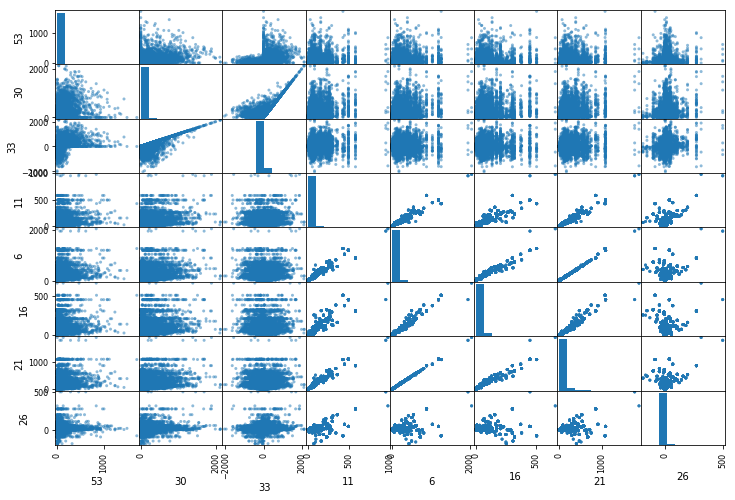

In [14]:
reload(pd)
attributes = [53, 30, 33, 11, 6, 16, 21, 26]
scatter_matrix(exploration_set[attributes], figsize=(12, 8))

### import data

In [3]:
combined_train = pd.concat([pd.read_csv(pathToFile + f, index_col=False, header=None) for f in training_files ], sort=False)

In [4]:
X_train_all = combined_train.iloc[:,:-1]
y_train_all = combined_train.iloc[:,-1:]

original_X_train_list = []
y_train_list = []

In [5]:
for i in range(5):
    original_X_train_list.append(pd.read_csv(pathToFile + training_files[i], index_col=False, header=None).iloc[:,:-1])
    y_train_list.append(pd.read_csv(pathToFile + training_files[i], index_col=False, header=None).iloc[:,-1:])

original_X_train_list.append(X_train_all)
y_train_list.append(y_train_all)

In [6]:
pathToTestFile = r"./dataset/Testing/TestSet/"

test_files = ['Test_Case_1.csv', 'Test_Case_2.csv', 'Test_Case_3.csv',
              'Test_Case_4.csv', 'Test_Case_5.csv', 'Test_Case_5.csv', 
              'Test_Case_6.csv', 'Test_Case_7.csv', 'Test_Case_8.csv', 
              'Test_Case_9.csv', 'Test_Case_10.csv']
for f in test_files:
    test = pd.concat([pd.read_csv(pathToTestFile + f)])
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1:]

#### feature selection

In [8]:
# Fitting a feature selector, remove the features that have exactly the same values in all the training examples
def feature_selection(train_instances):
    print('Crossvalidation started... ')
    selector = VarianceThreshold()
    selector.fit(train_instances)
    print('Number of features used... ' +
              str(Counter(selector.get_support())[True]))
    print('Number of features ignored... ' +
              str(Counter(selector.get_support())[False]))
    print(Counter(selector.get_support()))
    return selector

In [9]:
# X_train_list is the modified training instances
X_train_list = original_X_train_list.copy()

In [10]:
# Learn the features to filter from train set
# Transform train and test subsets
for train in X_train_list:
    fs = feature_selection(train)
    train = fs.transform(train)

Crossvalidation started... 
Number of features used... 52
Number of features ignored... 1
Counter({True: 52, False: 1})
Crossvalidation started... 
Number of features used... 52
Number of features ignored... 1
Counter({True: 52, False: 1})
Crossvalidation started... 
Number of features used... 52
Number of features ignored... 1
Counter({True: 52, False: 1})
Crossvalidation started... 
Number of features used... 52
Number of features ignored... 1
Counter({True: 52, False: 1})
Crossvalidation started... 
Number of features used... 52
Number of features ignored... 1
Counter({True: 52, False: 1})
Crossvalidation started... 
Number of features used... 52
Number of features ignored... 1
Counter({True: 52, False: 1})


In [8]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#### grid search

In [12]:
# used the orinignal x training instances instead of the modifies ones

def grid_search(model):
    for i in range(6):
        scores = cross_val_score(model, original_X_train_list[i], y_train_list[i],
                                        scoring="neg_mean_squared_error", cv=10)
        rmse_scores = np.sqrt(-scores)
        if i == 5:
            print("Variant overall: ")
        else:
            print("Variant {0}: ".format(i + 1))
        display_scores(rmse_scores)

#### linear regression

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
for i in range(6):
    lin_reg.fit(X_train_list[i], y_train_list[i])
    
    rms = sqrt(mean_squared_error(y_test, lin_reg.predict(X_test)))
    if i == 5:
        print("Variant overall: ", rms)
    else:
        print("Variant {0}: ".format(i + 1), rms)

Variant 1:  76.03339326813601
Variant 2:  69.47673578082606
Variant 3:  65.81800233065375
Variant 4:  74.23468686798097
Variant 5:  88.85623287053683
Variant overall:  69.00928537125812


In [15]:
grid_search(lin_reg)

Variant 1:  69.00928537125812
Scores: [32.68915625 30.19323889 30.4511161  28.08723677 33.45181801 29.43153843
 21.78276769 41.40817313 23.28402426 22.56698941]
Mean: 29.33460589380299
Standard deviation: 5.629965115707735
Variant 2:  69.00928537125812
Scores: [34.54300033 31.03716216 25.24745302 24.33683476 33.94178409 25.01247494
 28.2238676  45.60362271 23.67799497 24.89319001]
Mean: 29.651738459637876
Standard deviation: 6.544064880985956
Variant 3:  69.00928537125812
Scores: [34.03169422 25.45570362 28.12738161 23.3612947  24.76351385 21.56283034
 19.83838637 40.24666898 23.60294423 26.52873558]
Mean: 26.75191534923142
Standard deviation: 5.820781662599076
Variant 4:  69.00928537125812
Scores: [34.47461006 25.31874558 26.32857177 26.40243209 25.39716628 28.81890227
 21.84107589 42.10161044 22.81076376 25.32890672]
Mean: 27.88227848715137
Standard deviation: 5.767261328531419
Variant 5:  69.00928537125812
Scores: [35.13247773 27.55899145 25.40122418 25.90419594 27.76327204 24.88909

#### polynomial regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=True)
lin_reg = LinearRegression()
for i in range(6):
    X_poly = poly_features.fit_transform(X_train_list[i])
    lin_reg.fit(X_poly, y_train_list[i])
    
    X_test_poly = poly_features.fit_transform(X_test)
    y_predicted = lin_reg.predict(X_test_poly)
    rms = sqrt(mean_squared_error(y_test, y_predicted))

    if i == 5:
        print("Variant overall: ", rms, lin_reg.intercept_, lin_reg.coef_)
    else:
        print("Variant {0}: ".format(i + 1), rms, lin_reg.intercept_, lin_reg.coef_)

Variant 1:  1399.5406542606897 [1.94177032] [[ 9.82688085e-03  5.78036115e-04  2.54493904e-05 ... -1.06843735e-02
   0.00000000e+00 -7.29756707e-04]]
Variant 2:  3096.5671194693928 [5.95246589] [[-1.26932819e-03 -6.49879157e-04 -1.82654149e-05 ... -4.33965150e-03
   0.00000000e+00 -2.47517504e-03]]
Variant 3:  866.359398131891 [5.43732362] [[-1.72527681e-02  4.78338371e-04 -2.55912635e-07 ... -6.51019381e-03
   0.00000000e+00  1.88164807e-03]]
Variant 4:  48524.618332151455 [2.21880765] [[-8.88073527e-03 -7.49891140e-05  2.81679428e-05 ... -3.18319966e-03
   0.00000000e+00  2.35730624e-04]]
Variant 5:  8186.991439661674 [2.53890096] [[-1.97618950e-03  1.46882713e-04  1.16342662e-05 ... -4.05670710e-03
   0.00000000e+00 -9.38078474e-04]]
Variant overall:  94.62786225543991 [4.92105257] [[-7.04186909e-03  5.64920175e-04 -3.23562319e-05 ... -3.80530038e-03
   0.00000000e+00 -1.04229412e-04]]


#### decision tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=12, random_state=42)

for i in range(6):
    tree_reg.fit(X_train_list[i], y_train_list[i])
    y_predicted = tree_reg.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, y_predicted))

    if i == 5:
        print("Variant overall: ", rms, tree_reg.feature_importances_)
    else:
        print("Variant {0}: ".format(i + 1), rms, tree_reg.feature_importances_)

Variant 1:  99.69758326175952 [7.10522935e-03 1.21425523e-02 9.89321643e-03 1.13371940e-02
 1.34166654e-04 6.14060081e-03 1.48761216e-02 3.47381769e-03
 2.34298709e-03 1.75964554e-04 1.00911043e-03 8.00682887e-03
 1.01233814e-02 1.90309610e-02 0.00000000e+00 1.18250556e-02
 6.83725878e-03 7.19840556e-03 2.75172229e-03 7.57892334e-05
 1.67230150e-02 2.91869807e-03 1.60526668e-03 3.88364063e-02
 4.05229340e-03 1.16449715e-03 1.86031088e-03 1.42324242e-03
 8.83734779e-04 5.18112926e-02 2.81098928e-01 7.69487112e-04
 6.23671399e-03 1.17680241e-02 2.48262054e-01 1.62288597e-02
 1.46596285e-01 0.00000000e+00 3.35569255e-04 2.09276845e-03
 1.32987521e-03 5.86389357e-03 1.01603015e-02 5.61419168e-03
 1.21300260e-03 1.13000363e-03 2.64939503e-03 3.69789789e-04
 2.45514464e-04 2.40075242e-04 3.80436178e-04 1.19752259e-03
 4.58188580e-04]
Variant 2:  90.26985555483283 [5.56067630e-03 7.66645016e-03 5.62384363e-02 8.85395213e-03
 1.16144275e-03 3.52265094e-02 7.74696614e-02 8.23130977e-03
 5.76360

In [20]:
np.argsort(tree_reg.feature_importances_)[::-1]

array([30, 34, 36,  6, 11, 35,  5, 33, 32,  2, 28,  1, 20,  0, 18, 29,  3,
       17, 27, 13, 12, 10, 22, 24,  7, 26, 23,  8, 16, 49, 21, 40, 15, 41,
       45, 25, 48, 51, 46, 44, 42, 47, 38, 50, 52, 43, 31, 19,  4, 39,  9,
       14, 37])

In [21]:
grid_search(tree_reg)

Variant 1:  60.52922905258934
Scores: [44.09643976 29.81463771 29.52805559 27.72920536 34.154825   26.1350898
 23.64090646 37.27022184 25.55938822 27.75151739]
Mean: 30.568028713510405
Standard deviation: 5.925923150078157
Variant 2:  60.52922905258934
Scores: [40.29955307 30.85061222 24.23557869 20.60636427 25.60223421 24.10732215
 28.72669158 38.98433726 21.02531813 28.73813095]
Mean: 28.317614250682773
Standard deviation: 6.469234241085845
Variant 3:  60.52922905258934
Scores: [33.11834431 24.8412783  27.59950263 21.62929847 22.75100994 21.42765358
 22.0380201  35.1127571  24.53211954 24.55677645]
Mean: 25.760676040998067
Standard deviation: 4.555673659786577
Variant 4:  60.52922905258934
Scores: [28.14854922 25.07953998 27.80577889 22.98529692 24.14389334 24.01907044
 22.62950167 35.49094673 20.42683234 24.20710578]
Mean: 25.49365153154473
Standard deviation: 3.979084126010399
Variant 5:  60.52922905258934
Scores: [35.15378392 32.76170761 23.28353516 27.00764389 27.35556606 22.8735

note: max_depth
4 63.24391058464195
5 68.8412014560354
7 81.84206024303708
10 76.01870207652473
12 60.52922905258934
15 70.74621343597727

#### random forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(max_depth=8, random_state=0,
                                  n_estimators=100)

for i in range(6):
    rnd_clf.fit(X_train_list[i], y_train_list[i])
    y_pred_rf = rnd_clf.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, y_pred_rf))
    
    if i == 5:
        print("Variant overall: ", rms, rnd_clf.feature_importances_)
    else:
        print("Variant {0}: ".format(i + 1), rms, rnd_clf.feature_importances_)
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Variant 1:  62.72319832739916 [6.44488635e-03 7.85246335e-03 7.16675814e-03 6.66557595e-03
 9.59349269e-04 7.46575767e-03 4.81652033e-03 8.62548976e-03
 7.54364185e-03 3.28591958e-04 4.81063355e-03 1.16479021e-02
 9.19282859e-03 1.92532152e-02 4.94436424e-08 1.05496877e-02
 7.92395768e-03 7.92820295e-03 6.15882921e-03 1.38787113e-03
 5.00039179e-03 4.07314819e-03 6.91030397e-03 7.75976527e-03
 1.09730726e-02 5.67049690e-03 9.79558624e-03 4.26419672e-03
 3.40778755e-03 2.23561991e-02 2.77482988e-01 1.34109153e-04
 2.08729417e-02 7.06282357e-02 2.44717658e-01 1.37220224e-02
 1.37269548e-01 0.00000000e+00 1.70047661e-04 1.33515888e-03
 1.16877417e-03 8.88078429e-04 2.08363480e-03 5.45520581e-04
 2.03645746e-03 3.54602610e-04 1.18939937e-03 7.44553381e-04
 8.36773843e-04 3.09233085e-03 1.57344463e-03 1.16879680e-03
 1.05176283e-03]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Variant 2:  60.59545223746803 [1.21236415e-02 6.99411813e-03 2.75113240e-02 4.54734559e-03
 1.85415135e-04 6.87558303e-03 2.82538816e-02 1.85919638e-02
 9.77769692e-03 6.70120677e-04 3.41505523e-03 1.00671263e-02
 1.56327678e-02 8.51290884e-03 0.00000000e+00 4.24827084e-03
 1.60061378e-02 7.53062999e-03 1.14649369e-02 6.62493706e-04
 2.42244339e-03 1.83597552e-02 1.40548541e-02 4.77792434e-03
 1.47589501e-02 4.48369544e-03 1.07890413e-02 8.91847521e-03
 6.25111693e-03 1.56402454e-02 2.68704512e-01 8.16574158e-04
 1.79218127e-02 5.54284057e-02 2.33549442e-01 1.30523488e-02
 9.53088973e-02 0.00000000e+00 3.93747348e-04 1.15544828e-03
 2.02911477e-03 3.51200977e-03 1.34546740e-03 1.90039479e-03
 4.65086811e-04 1.04207256e-03 6.04979066e-04 2.51984613e-03
 2.09358322e-03 1.30948121e-03 2.04050964e-03 5.06764022e-04
 7.71582666e-04]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Variant 3:  51.87744830754677 [9.16574436e-03 5.56382799e-03 8.36640514e-03 5.31177246e-03
 5.22717614e-04 8.29219378e-03 1.70986075e-02 1.10184667e-02
 6.59629066e-03 1.31514564e-03 2.11968454e-03 1.70070730e-02
 9.41498974e-03 1.21761080e-02 0.00000000e+00 1.87108674e-03
 3.27581633e-02 6.99481527e-03 4.15914533e-03 9.63225277e-04
 4.59768369e-03 2.87782411e-02 1.25334917e-02 5.86828172e-03
 3.26686666e-03 1.90424178e-03 1.02281605e-02 4.94404261e-03
 9.59109518e-03 2.32480090e-02 3.08535526e-01 1.71927049e-04
 2.39906367e-02 5.20969844e-02 2.32017468e-01 9.33754753e-03
 9.20619966e-02 0.00000000e+00 1.32232794e-04 1.40922603e-03
 1.04391575e-03 1.71629901e-03 6.77812480e-04 5.52700503e-04
 1.39304984e-03 2.74016245e-04 1.31996259e-03 6.77661705e-04
 4.19485149e-03 4.31086477e-04 5.25989560e-04 1.43032222e-03
 3.33209488e-04]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Variant 4:  69.57726931681685 [9.41108095e-03 4.55604396e-03 8.89955327e-03 7.67433464e-03
 9.36216023e-04 1.06905550e-02 1.00869404e-02 1.36580020e-02
 9.22130312e-03 7.87831177e-04 2.55872731e-03 1.74043666e-02
 7.73850356e-03 1.84237428e-02 0.00000000e+00 4.33238264e-03
 1.57314445e-02 6.67595927e-03 1.78182145e-02 7.21472437e-04
 6.44492473e-03 1.14458520e-02 1.12405272e-02 9.85307066e-03
 5.35479048e-03 2.84875083e-03 1.08513760e-02 7.69319973e-03
 1.28293289e-02 1.58336991e-02 3.32203828e-01 1.58967552e-04
 1.77644898e-02 2.13404192e-02 2.29427364e-01 1.87092276e-02
 1.03562095e-01 0.00000000e+00 3.29832050e-04 1.77327753e-04
 1.15571062e-03 2.87917180e-03 1.37955063e-03 5.76727302e-04
 1.05082395e-03 7.51389520e-04 6.72469618e-04 6.14963854e-04
 1.81077027e-03 1.75971785e-03 6.09414269e-04 7.70124876e-04
 5.73420920e-04]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Variant 5:  57.46927911957149 [6.74285077e-03 6.29247909e-03 6.75218691e-03 4.38620071e-03
 1.51216826e-04 1.38080458e-02 2.57237495e-02 6.97503205e-03
 6.93173658e-03 4.64896806e-04 1.62514764e-03 3.09647492e-02
 1.06314135e-02 6.47504357e-03 0.00000000e+00 1.80120216e-03
 2.18835838e-02 4.34685213e-03 7.65983390e-03 1.54111376e-04
 3.49813139e-03 2.23830843e-02 8.98251881e-03 2.60233327e-03
 4.67990904e-03 2.00448489e-03 6.28131331e-03 4.18762851e-03
 1.20379277e-02 2.27102945e-02 3.43168694e-01 1.17162587e-04
 2.24610250e-02 3.74355478e-02 2.51358295e-01 8.52663965e-03
 7.13711902e-02 0.00000000e+00 1.13018936e-04 5.32942919e-04
 5.74525933e-04 1.87841730e-03 1.26424343e-03 2.99073541e-04
 5.02421779e-04 4.51303264e-04 6.32716440e-04 5.67083240e-04
 8.70351616e-04 1.67585730e-03 1.73613774e-03 3.74867426e-04
 9.50526514e-04]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Variant overall:  57.8040005639679 [5.44991883e-03 6.86080144e-03 9.96877346e-03 5.47939296e-03
 3.87280415e-04 1.41628543e-02 3.96152171e-02 1.03258116e-02
 7.15890597e-03 2.56140902e-04 1.54388585e-03 7.56086267e-03
 6.26014999e-03 6.07870228e-03 0.00000000e+00 1.23959840e-03
 1.90332312e-02 3.37697062e-03 7.04772902e-03 2.17562574e-04
 2.96240221e-03 2.16291575e-02 1.13896531e-02 4.80632367e-03
 2.48304655e-03 1.50004862e-03 2.74963202e-03 2.11275637e-03
 1.53957411e-02 2.25789301e-02 3.57136088e-01 7.60979405e-05
 2.04691363e-02 2.38455761e-02 2.57895712e-01 8.16922705e-03
 8.57920665e-02 0.00000000e+00 2.32692302e-04 1.80456860e-04
 5.18488477e-04 1.47842583e-03 5.37781608e-04 3.53960101e-04
 2.42800709e-04 3.89328343e-04 2.10461360e-04 2.84763910e-04
 8.10342575e-04 8.04320161e-04 4.40224454e-04 2.15034050e-04
 2.85534280e-04]


In [9]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(max_depth=8, random_state=0,
                                  n_estimators=100)
rnd_clf.fit(X_train_all, y_train_all)
y_pred_rf = rnd_clf.predict(X_test)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


note: 
5 61.20775368071681
7 58.97565854598216
8 57.8040005639679
9 59.16602957537276
10 58.721486172923015
15 59.89968118558552

In [10]:
np.argsort(rnd_clf.feature_importances_)[::-1]

array([30, 34, 36,  6, 33, 29, 21, 32, 16, 28,  5, 22,  7,  2, 35, 11,  8,
       18,  1, 12, 13,  3,  0, 23, 17, 20, 26, 24, 27, 10, 25, 41, 15, 48,
       49, 42, 40, 50, 45,  4, 43, 52, 47,  9, 44, 38, 19, 51, 46, 39, 31,
       37, 14])

In [ ]:
grid_search(rnd_clf)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

Variant 1: 
Scores: [22.95685487 20.15527669 22.45654141 25.00491623 23.08701032 18.87254829
 19.87758585 29.69849437 17.35099261 18.44895241]
Mean: 21.79091730460176
Standard deviation: 3.493945948313318


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

#### gradient boosting

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=6, n_estimators=3, learning_rate=1.0, random_state=42)

for i in range(6):
    gbrt.fit(X_train_list[i], y_train_list[i])
    y_predicted = gbrt.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, y_predicted))
    
    if i == 5:
        print("Variant overall: ", rms)
    else:
        print("Variant {0}: ".format(i + 1), rms)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant 1:  72.08202510646414


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant 2:  132.09428657080952


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant 3:  62.42685200771992


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant 4:  69.97602517694499


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant 5:  65.0001545415923


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant overall:  82.90077871909423


#### neural net

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler 

training a Multi-Layer Perceptron (MLP)
- inputs:
    - x: set of features/attributes(array size: (n_samples,n_features))
    - y: target values/class labels(array size: (n_samples,))
    - k: number of folds of cross validation (10 as default)
- outputs:
    - regressor: the MLP regressor (object)
    - scaler: the scaling of training data

In [25]:
for i in range(6):
    scaler = StandardScaler()
    scaler.fit(X_train_list[i])
    MLPReg = MLPRegressor(alpha = 1e-4, hidden_layer_sizes = (150,5,), 
    random_state = 12, max_iter = 500, activation = 'relu',
    verbose = True, early_stopping = True, learning_rate_init = 0.001)
    mlp = MLPReg.fit(scaler.transform(X_train_list[i]), y_train_list[i])
    predict_labels = mlp.predict(scaler.transform(X_test))
    rms = sqrt(mean_squared_error(y_test, predict_labels))
    if i == 5:
        print("Variant overall: ", rms)
    else:
        print("Variant {0}: ".format(i + 1), rms)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 525.52763257
Validation score: 0.295081
Iteration 2, loss = 431.02174094
Validation score: 0.341772
Iteration 3, loss = 415.82160481
Validation score: 0.356275
Iteration 4, loss = 406.37237582
Validation score: 0.369474
Iteration 5, loss = 396.13467152
Validation score: 0.385910
Iteration 6, loss = 386.17967873
Validation score: 0.373560
Iteration 7, loss = 382.04747864
Validation score: 0.408482
Iteration 8, loss = 370.12045260
Validation score: 0.417381
Iteration 9, loss = 361.69566521
Validation score: 0.433801
Iteration 10, loss = 354.23221095
Validation score: 0.454335
Iteration 11, loss = 351.30934859
Validation score: 0.460465
Iteration 12, loss = 339.85922220
Validation score: 0.477770
Iteration 13, loss = 333.48864344
Validation score: 0.486766
Iteration 14, loss = 325.64216777
Validation score: 0.482897
Iteration 15, loss = 321.47563372
Validation score: 0.491466
Iteration 16, loss = 314.21717725
Validation score: 0.506830
Iteration 17, loss = 314.98709932

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 508.86816898
Validation score: 0.335793
Iteration 2, loss = 425.57450072
Validation score: 0.344854
Iteration 3, loss = 409.08138440
Validation score: 0.381878
Iteration 4, loss = 392.17346668
Validation score: 0.414270
Iteration 5, loss = 381.90249689
Validation score: 0.440164
Iteration 6, loss = 365.50410301
Validation score: 0.419253
Iteration 7, loss = 356.49760537
Validation score: 0.444655
Iteration 8, loss = 345.40246715
Validation score: 0.476499
Iteration 9, loss = 338.45670499
Validation score: 0.480274
Iteration 10, loss = 327.48235733
Validation score: 0.443865
Iteration 11, loss = 322.41127067
Validation score: 0.489523
Iteration 12, loss = 312.25815680
Validation score: 0.496293
Iteration 13, loss = 309.19765331
Validation score: 0.513057
Iteration 14, loss = 297.06992716
Validation score: 0.457981
Iteration 15, loss = 300.32944919
Validation score: 0.484840
Iteration 16, loss = 289.59995866
Validation score: 0.521055
Iteration 17, loss = 283.70855689

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 401.87076046
Validation score: 0.461332
Iteration 2, loss = 337.54384928
Validation score: 0.480620
Iteration 3, loss = 319.68707244
Validation score: 0.528708
Iteration 4, loss = 300.11345379
Validation score: 0.516101
Iteration 5, loss = 285.60333404
Validation score: 0.562061
Iteration 6, loss = 270.87014862
Validation score: 0.587380
Iteration 7, loss = 262.28182970
Validation score: 0.585507
Iteration 8, loss = 258.64083353
Validation score: 0.607313
Iteration 9, loss = 245.50768625
Validation score: 0.626802
Iteration 10, loss = 238.71595340
Validation score: 0.611780
Iteration 11, loss = 233.99009715
Validation score: 0.621132
Iteration 12, loss = 232.41842872
Validation score: 0.638236
Iteration 13, loss = 224.43046534
Validation score: 0.639443
Iteration 14, loss = 217.01718992
Validation score: 0.638738
Iteration 15, loss = 211.93410848
Validation score: 0.651339
Iteration 16, loss = 211.07751275
Validation score: 0.655508
Iteration 17, loss = 201.38003479

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 405.62439505
Validation score: 0.371167
Iteration 2, loss = 351.64424888
Validation score: 0.411997
Iteration 3, loss = 330.95562848
Validation score: 0.440500
Iteration 4, loss = 312.06091440
Validation score: 0.448668
Iteration 5, loss = 299.02686686
Validation score: 0.489178
Iteration 6, loss = 286.10441461
Validation score: 0.506623
Iteration 7, loss = 278.02034676
Validation score: 0.516387
Iteration 8, loss = 270.83368854
Validation score: 0.509479
Iteration 9, loss = 266.01322303
Validation score: 0.501708
Iteration 10, loss = 257.87913776
Validation score: 0.521001
Iteration 11, loss = 252.54598250
Validation score: 0.537035
Iteration 12, loss = 248.53532401
Validation score: 0.496001
Iteration 13, loss = 240.32382012
Validation score: 0.551253
Iteration 14, loss = 234.40872814
Validation score: 0.549583
Iteration 15, loss = 234.27936895
Validation score: 0.542511
Iteration 16, loss = 228.60914873
Validation score: 0.532776
Iteration 17, loss = 220.52692776

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 395.77005317
Validation score: 0.384385
Iteration 2, loss = 340.11523842
Validation score: 0.434836
Iteration 3, loss = 313.84097268
Validation score: 0.475388
Iteration 4, loss = 300.22732083
Validation score: 0.499796
Iteration 5, loss = 286.27556535
Validation score: 0.530974
Iteration 6, loss = 277.47790190
Validation score: 0.506087
Iteration 7, loss = 268.35084149
Validation score: 0.534633
Iteration 8, loss = 264.87477582
Validation score: 0.564952
Iteration 9, loss = 258.21443957
Validation score: 0.576547
Iteration 10, loss = 250.95541247
Validation score: 0.541921
Iteration 11, loss = 248.85096743
Validation score: 0.581770
Iteration 12, loss = 243.08050729
Validation score: 0.597276
Iteration 13, loss = 242.64812854
Validation score: 0.572713
Iteration 14, loss = 238.59943355
Validation score: 0.592818
Iteration 15, loss = 232.75029510
Validation score: 0.600768
Iteration 16, loss = 230.04380052
Validation score: 0.594725
Iteration 17, loss = 229.76992840

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 359.47681068
Validation score: 0.495548
Iteration 2, loss = 294.38031560
Validation score: 0.532208
Iteration 3, loss = 267.31289546
Validation score: 0.548850
Iteration 4, loss = 251.36979589
Validation score: 0.588507
Iteration 5, loss = 241.28461228
Validation score: 0.585489
Iteration 6, loss = 232.03370584
Validation score: 0.601702
Iteration 7, loss = 223.56702092
Validation score: 0.608840
Iteration 8, loss = 215.60601234
Validation score: 0.597483
Iteration 9, loss = 208.59880956
Validation score: 0.604175
Iteration 10, loss = 204.33948050
Validation score: 0.623606
Iteration 11, loss = 200.08945549
Validation score: 0.624466
Iteration 12, loss = 196.27365170
Validation score: 0.611747
Iteration 13, loss = 194.39092816
Validation score: 0.631335
Iteration 14, loss = 189.15459226
Validation score: 0.625598
Iteration 15, loss = 190.11258114
Validation score: 0.629453
Iteration 16, loss = 185.40146474
Validation score: 0.611660
Iteration 17, loss = 185.85205823

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
